<a href="https://colab.research.google.com/github/Romsalways/gptstudio/blob/main/Conjugate_Gradient_Method_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Sparsity level: 20%, Number of locations: 300
CG method failed to converge, info: 3000

Sparsity level: 20%, Number of locations: 600
CG method failed to converge, info: 6000

Sparsity level: 20%, Number of locations: 1000
CG method failed to converge, info: 10000

Sparsity level: 50%, Number of locations: 300
CG method failed to converge, info: 3000

Sparsity level: 50%, Number of locations: 600
CG method failed to converge, info: 6000

Sparsity level: 50%, Number of locations: 1000
CG method failed to converge, info: 10000

Sparsity level: 100%, Number of locations: 300
CG method converged.

Sparsity level: 100%, Number of locations: 600
CG method converged.

Sparsity level: 100%, Number of locations: 1000
CG method converged.


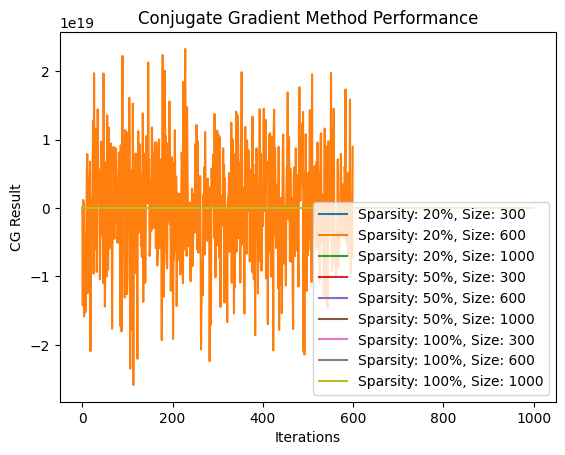

In [33]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Simulation settings
sparsity_levels = [0.2, 0.5, 1.0]  # 20%, 50%, 100% zero entries
location_sizes = [300, 600, 1000]
num_covariates = 4

# Function to create a spatial covariance matrix with controlled sparsity
def create_spatial_cov_matrix(size, sparsity_level):
    np.random.seed(0)
    matrix = np.random.rand(size, size)
    matrix = (matrix + matrix.T) / 2  # Make it symmetric
    mask = np.random.rand(size, size) < sparsity_level  # Random mask for sparsity
    matrix[mask] = 0  # Apply sparsity
    np.fill_diagonal(matrix, 1)  # Ensure positive diagonal for covariance
    return sp.csr_matrix(matrix)  # Return sparse matrix

# Function to generate covariates
def generate_covariates(num_samples, num_covariates):
    return np.random.randn(num_samples, num_covariates)

# Function to generate response variable using normal distribution
def generate_response(covariates, spatial_matrix, noise_variance=0.1):
    signal = np.dot(covariates, np.random.randn(covariates.shape[1]))  # Random linear combination of covariates
    spatial_effect = spla.spsolve(spatial_matrix, np.random.randn(covariates.shape[0]))  # Solve for spatial effect
    noise = np.random.randn(covariates.shape[0]) * noise_variance
    return signal + spatial_effect + noise

# Function to assess performance using CG method
def assess_cg_performance(spatial_matrix, rhs):
    cg_result, info = spla.cg(spatial_matrix, rhs)
    if info == 0:
        print("CG method converged.")
    else:
        print(f"CG method failed to converge, info: {info}")
    return cg_result

# Simulation loop over different sparsity levels and location sizes
for sparsity in sparsity_levels:
    for size in location_sizes:
        print(f"\nSparsity level: {int(sparsity * 100)}%, Number of locations: {size}")

        # Generate spatial covariance matrix with given sparsity
        spatial_matrix = create_spatial_cov_matrix(size, sparsity)

        # Generate covariates
        covariates = generate_covariates(size, num_covariates)

        # Generate response variable (normal distribution)
        response = generate_response(covariates, spatial_matrix)

        # Assess performance using CG method
        rhs = np.random.randn(size)
        result = assess_cg_performance(spatial_matrix, rhs)

        # Optionally, visualize result or convergence
        plt.plot(result, label=f"Sparsity: {int(sparsity * 100)}%, Size: {size}")
        plt.legend()

plt.xlabel("Iterations")
plt.ylabel("CG Result")
plt.title("Conjugate Gradient Method Performance")
plt.show()


Can I visualize covariance?


Sparsity level: 20%, Number of locations: 300


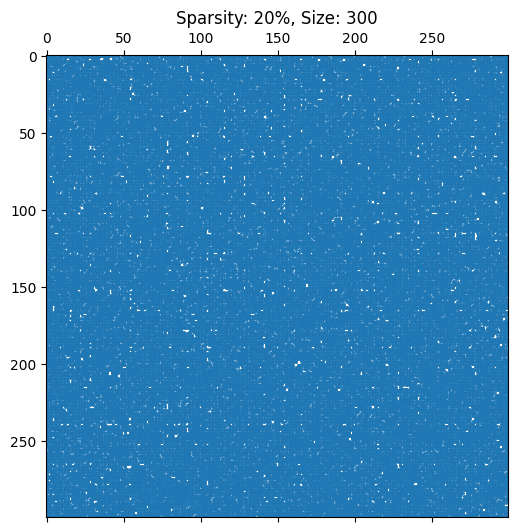


Sparsity level: 20%, Number of locations: 600


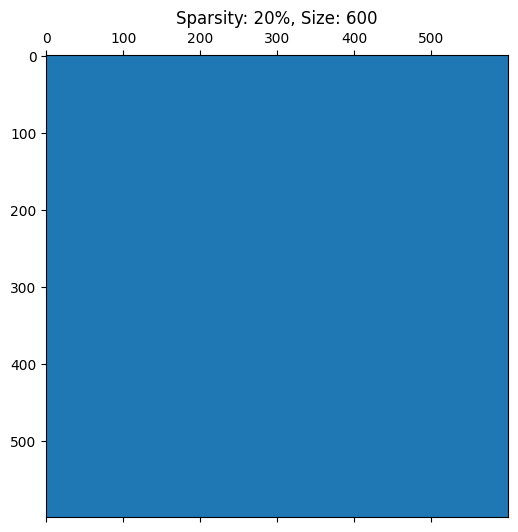


Sparsity level: 20%, Number of locations: 1000


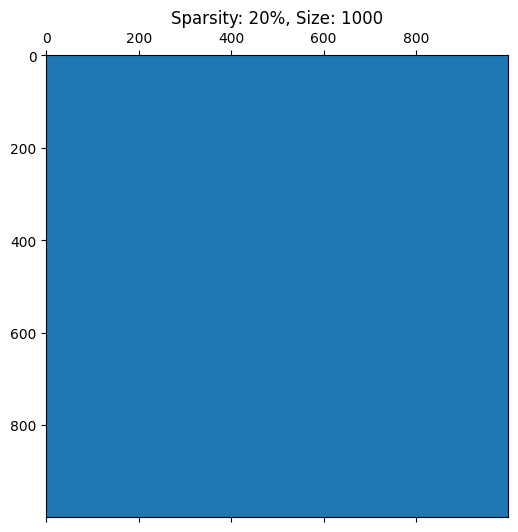


Sparsity level: 50%, Number of locations: 300


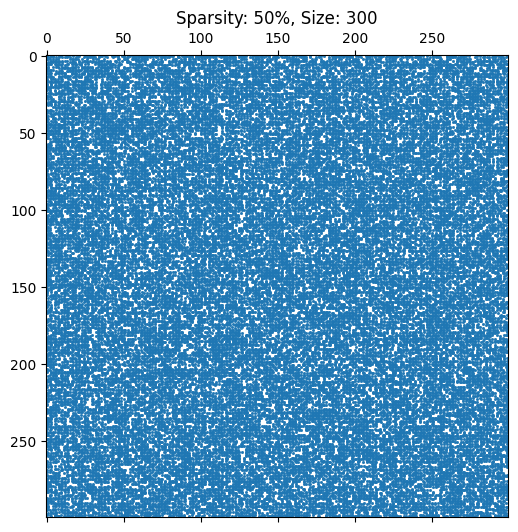


Sparsity level: 50%, Number of locations: 600


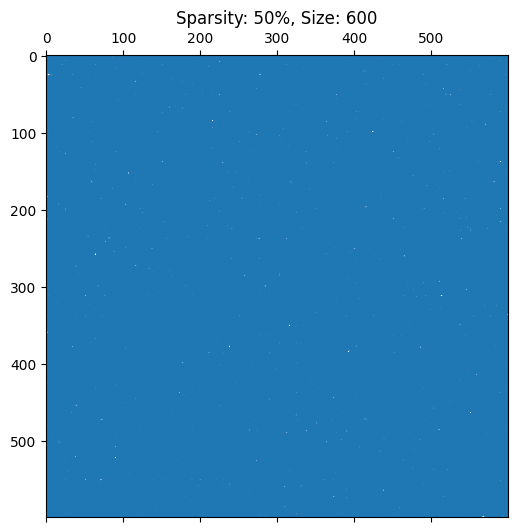


Sparsity level: 50%, Number of locations: 1000


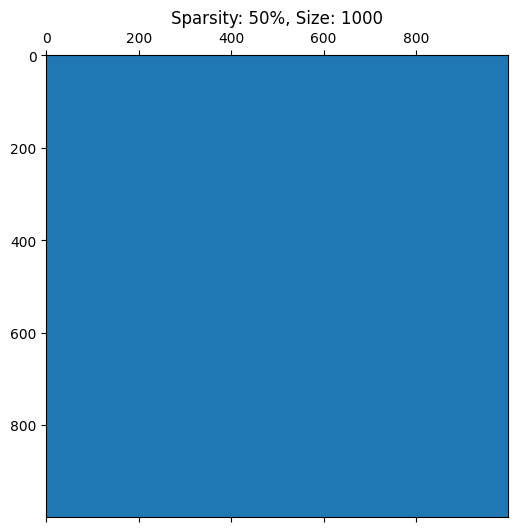


Sparsity level: 100%, Number of locations: 300


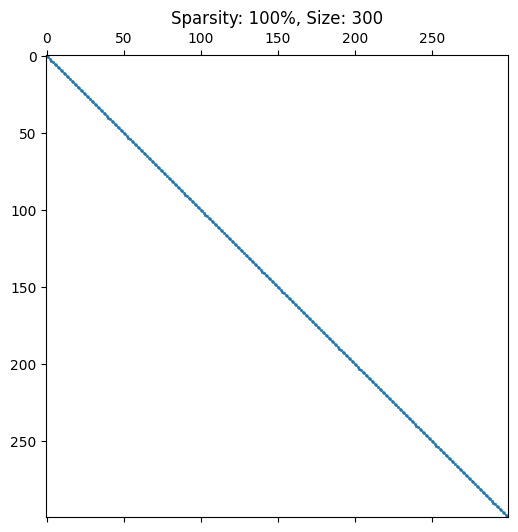


Sparsity level: 100%, Number of locations: 600


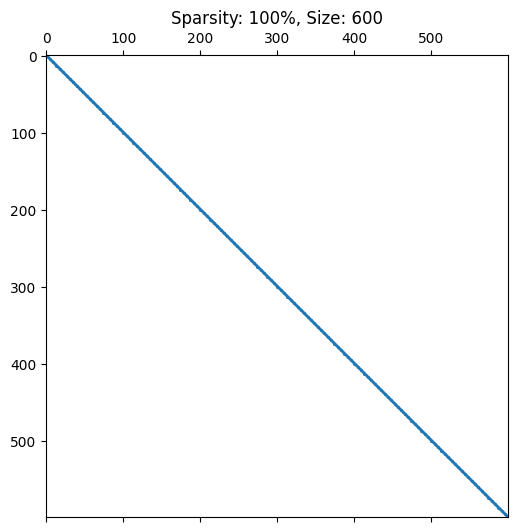


Sparsity level: 100%, Number of locations: 1000


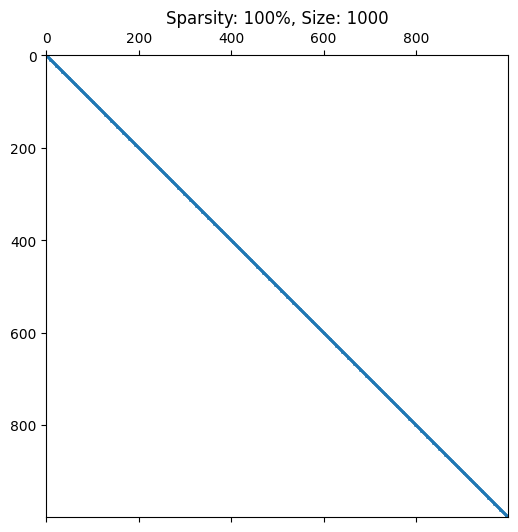

In [48]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Simulation settings
sparsity_levels = [0.2, 0.5, 1.0]  # 20%, 50%, 100% zero entries
location_sizes = [300, 600, 1000]

# Function to create a spatial covariance matrix with controlled sparsity
def create_spatial_cov_matrix(size, sparsity_level):
    np.random.seed(0)
    matrix = np.random.rand(size, size)
    matrix = (matrix + matrix.T) / 2  # Make it symmetric
    mask = np.random.rand(size, size) < sparsity_level  # Random mask for sparsity
    matrix[mask] = 0  # Apply sparsity
    np.fill_diagonal(matrix, 1)  # Ensure positive diagonal for covariance
    return sp.csr_matrix(matrix)  # Return sparse matrix

# Function to visualize covariance matrix
def visualize_cov_matrix(matrix, title="Covariance Matrix"):
    plt.figure(figsize=(6, 6))
    plt.spy(matrix, markersize=1)  # Use sparse plotting function for efficient visualization
    plt.title(title)
    plt.show()

# Simulation loop over different sparsity levels and location sizes
for sparsity in sparsity_levels:
    for size in location_sizes:
        print(f"\nSparsity level: {int(sparsity * 100)}%, Number of locations: {size}")

        # Generate spatial covariance matrix with given sparsity
        spatial_matrix = create_spatial_cov_matrix(size, sparsity)

        # Visualize the covariance matrix
        fig=visualize_cov_matrix(spatial_matrix, title=f"Sparsity: {int(sparsity * 100)}%, Size: {size}")



How to assess CG accuracy?
Example Code for CG Accuracy Assessment

<ipython-input-43-881a9a88f426>:18: DeprecationWarning: 'scipy.sparse.linalg.cg' keyword argument `tol` is deprecated in favor of `rtol` and will be removed in SciPy v1.14.0. Until then, if set, it will override `rtol`.
  cg_result, info = spla.cg(spatial_matrix, rhs, tol=tol)


Residual norm: 1.260264352208386e+22
Relative error compared to exact solution: 5.845807216294376e+19


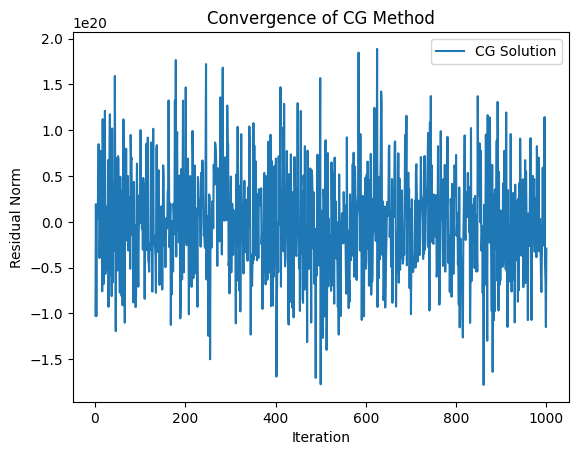

In [43]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Function to create a spatial covariance matrix with controlled sparsity
def create_spatial_cov_matrix(size, sparsity_level):
    np.random.seed(0)
    matrix = np.random.rand(size, size)
    matrix = (matrix + matrix.T) / 2  # Make it symmetric
    mask = np.random.rand(size, size) < sparsity_level  # Random mask for sparsity
    matrix[mask] = 0  # Apply sparsity
    np.fill_diagonal(matrix, 1)  # Ensure positive diagonal for covariance
    return sp.csr_matrix(matrix)  # Return sparse matrix

# Function to assess accuracy of CG method
def assess_cg_accuracy(spatial_matrix, rhs, exact_solution=None, tol=1e-6):
    cg_result, info = spla.cg(spatial_matrix, rhs, tol=tol)

    # Compute residual
    residual = rhs - spatial_matrix @ cg_result
    residual_norm = np.linalg.norm(residual)
    print(f"Residual norm: {residual_norm}")

    if exact_solution is not None:
        # Compare with exact solution
        error = np.linalg.norm(cg_result - exact_solution) / np.linalg.norm(exact_solution)
        print(f"Relative error compared to exact solution: {error}")

    return cg_result, residual_norm

# Simulation settings
sparsity_level = 0.2
location_size = 1000

# Generate spatial covariance matrix
spatial_matrix = create_spatial_cov_matrix(location_size, sparsity_level)

# Create an exact solution (for testing purposes)
exact_solution = np.random.randn(location_size)

# Compute the right-hand side based on the exact solution
rhs = spatial_matrix @ exact_solution

# Assess CG accuracy
cg_result, residual_norm = assess_cg_accuracy(spatial_matrix, rhs, exact_solution)

# Plot convergence (residual norm)
iterations = np.arange(1, len(cg_result) + 1)
plt.plot(iterations, cg_result, label='CG Solution')
plt.xlabel('Iteration')
plt.ylabel('Residual Norm')
plt.title('Convergence of CG Method')
plt.legend()
plt.show()
